In [ ]:
"""
SR University, Warangal, India.
Nural-Networks & Deep-Learning - (Professional Elective - 2).
Mentor - V.Venkatramana, EEE department.
Assignment - 8
18K41A0564 

"""


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats


In [ ]:
data = pd.read_excel("pressure_weight.xls")
data.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [ ]:
z = np.abs(stats.zscore(data))
print(z)

[[0.90855142 1.61656054]
 [0.95645395 1.59597943]
 [0.09420832 1.43904846]
 [1.45663625 1.63714165]
 [0.49259774 1.47763804]
 [1.30095302 2.6694559 ]
 [1.46861189 0.430574  ]
 [1.68097979 1.25896373]
 [1.00156217 2.78522465]
 [0.01357238 0.20229517]
 [0.98639304 0.47756754]
 [1.52849006 0.25117531]
 [0.54648809 0.22030365]
 [0.16326781 0.12254337]
 [0.98040522 0.28461962]
 [1.4714062  0.22544892]
 [1.44146712 0.22287629]
 [0.74089254 0.12254337]
 [1.16922104 0.16370559]
 [0.9057571  0.10453489]
 [0.10019614 0.24603004]
 [0.04031797 0.05565476]
 [0.98639304 0.31291865]
 [0.66025661 0.56503726]
 [1.77997837 0.10710753]
 [0.86064888 0.05565476]
 [0.84268543 0.04021892]
 [0.50137987 0.12768865]
 [0.35767226 0.27432906]
 [0.46265865 0.18102803]]


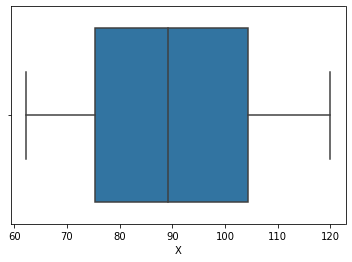

In [ ]:
sns.boxplot(x=data['X'])

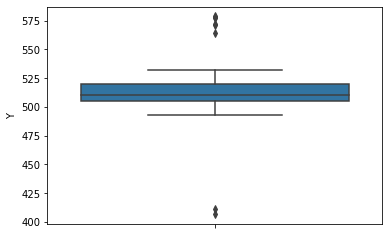

In [ ]:
sns.boxplot(y=data['Y'])

In [ ]:
f_data = data[(z < 3).all(axis=1)]
f_data.head()

,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [ ]:
print(len(data))
print(len(f_data))
if(len(data) == len(f_data)):
    print('No outliners')

30
30
No outliners


In [ ]:
data_n = data.copy()
data_n = (data_n - data_n.min())/(data_n.max() - data_n.min())
data_n.head()

,X,Y
0,0.223183,0.995346
1,0.209343,0.990692
2,0.458478,0.955207
3,0.906574,1.000000
4,0.628028,0.963933


In [ ]:
train_data,test_data = train_test_split(data_n,test_size=0.1)

print(len(train_data))
train_data.head()

27


,X,Y
21,0.474048,0.617219
9,0.489619,0.584061
12,0.643599,0.579988
17,0.271626,0.602094
10,0.200692,0.521815


In [ ]:
dtx = np.array(train_data['X'])
dty = np.array(train_data['Y'])

In [ ]:
from sympy import * 
#step-1
m0=1
c0=-1
epochs=100
learningrate=0.1

#step-2
x=Symbol('x')
y=Symbol('y')
m=Symbol('m')
c=Symbol('c')
E=(0.5)*(y-(m*x)-c)**2
fx=x**2+y**2+10
Em=E.diff(m)
Ec=E.diff(c)
err=[]
for itr in range(0,epochs):  #step-6
  dfEm1=0
  dfEc1=0
  er=0
  for j in range(0,len(dtx)):      
    #step-3
    er+=((dty[j]-(m0*dtx[j])-c0))**2
    dfEm=Em.subs(m,m0)
    dfEm=dfEm.subs(c,c0) 
    dfEm=dfEm.subs(x,dtx[j]) 
    dfEm=dfEm.subs(y,dty[j])
    dfEm=round(dfEm,2)
    dfEc=Ec.subs(m,m0)
    dfEc=dfEc.subs(c,c0) 
    dfEc=dfEc.subs(x,dtx[j]) 
    dfEc=dfEc.subs(y,dty[j])
    dfEc=round(dfEc,2)
    dfEm1+=dfEm
    dfEc1+=dfEc
  #step-4
  dfEm1 = dfEm1/len(dtx)
  dfEc1 = dfEc1/len(dtx)
  dfEm1 = round(dfEm1,2)
  dfEc1 = round(dfEc1,2)
  cm=(-1.0)*learningrate*dfEm1
  cc=(-1.0)*learningrate*dfEc1
 
  #step-5
  m0=m0+cm
  c0=c0+cc
  m0=round(m0,2)
  c0=round(c0,2)
  er = (1/(2*len(train_data['X'])))*(er)
  err.append(er)
#step-7
print('Minimum value is at m=',m0)
print('Minimum value is at c=',c0)

Minimum value is at m= 0.90
Minimum value is at c= 0.16


In [ ]:
train_data_pred =  m0*train_data['X'] + c0

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(train_data['Y'],train_data_pred)
mse

0.14446063891836872

Text(0.5, 1.0, 'predicted vs actual(Data)')

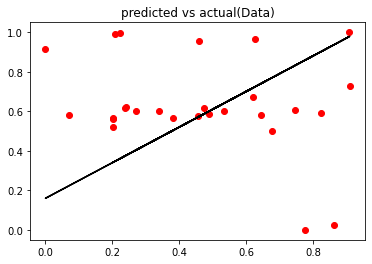

In [ ]:
plt.plot(np.array(train_data['X']),np.array(train_data_pred),'black')
plt.scatter(np.array(train_data['X']),np.array(train_data['Y']),color='red')
plt.title('predicted vs actual(Data)')

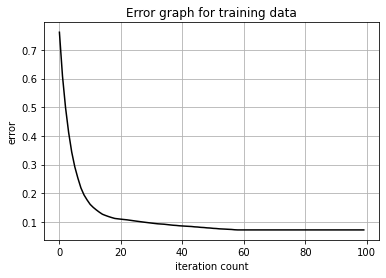

In [ ]:
iters = np.arange(epochs)
plt.plot(iters,err,'black')
plt.title("Error graph for training data")
plt.xlabel("iteration count")
plt.ylabel("error")
plt.grid()

In [ ]:
test_data_pred = m0 *test_data['X'] + c0
mse2 = mean_squared_error(test_data['Y'],test_data_pred)
mse2

0.17250752796030888

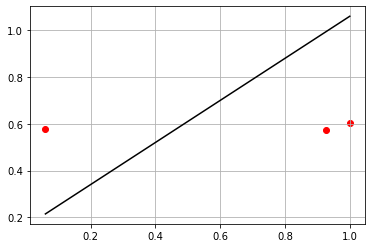

In [ ]:
plt.scatter(test_data['X'],test_data['Y'],color='red')
plt.plot(test_data['X'],test_data_pred,'black')
plt.grid()

In [ ]:
x_min = data['X'].min()
x_max = data['X'].max()
y_min = data['Y'].min()
y_max = data['Y'].max()

x =x0 = float(input("enter pressure of liquid nitrogen :"))
x = (x - x_min)/(x_max - x_min)
y = m0*x + c0
y = y*(y_max - y_min) + y_min
print(f"Weight of liquid nitrogen with pressure {x0} is : {y}")

enter pressure of liquid nitrogen :57
Weight of liquid nitrogen with pressure 57.0 is : 420.264303852860
